In [2]:
%pip install ydata-profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: C:\Users\Administrator\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

In [19]:
df = pd.read_csv('C:/Users/Administrator/Downloads/stroke_dataset.csv')

In [20]:
profile = ProfileReport(df, title="Reporte EDA", explorative=True)

oversampling/undersamplin - smote

In [9]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# Convertir variables categóricas a numéricas usando LabelEncoder
le = LabelEncoder()

for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[col] = le.fit_transform(df[col])

# Separar características y variable objetivo
X = df.drop(columns=['stroke'])
y = df['stroke']

In [22]:
# Dividir los datos en conjunto de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Crear el modelo sin early stopping
xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc'
)

# Separar un conjunto de validación para evaluar
X_val = X_test[:len(X_test)//2]  # Primera mitad como validación
y_val = y_test[:len(X_test)//2]
X_test_final = X_test[len(X_test)//2:]  # Segunda mitad como test final
y_test_final = y_test[len(X_test)//2:]

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_pred_val = xgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy en validación: {val_accuracy:.3f}")

# Si el accuracy en validación es bajo, detener el entrenamiento o modificar el modelo.

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [09:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy en validación: 0.930


In [25]:
from sklearn.metrics import classification_report, roc_auc_score

# Predicciones en el conjunto de test
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.3f}")

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.14      0.04      0.06        54

    accuracy                           0.94       997
   macro avg       0.54      0.51      0.51       997
weighted avg       0.90      0.94      0.92       997

AUC-ROC: 0.800


<Figure size 1000x800 with 0 Axes>

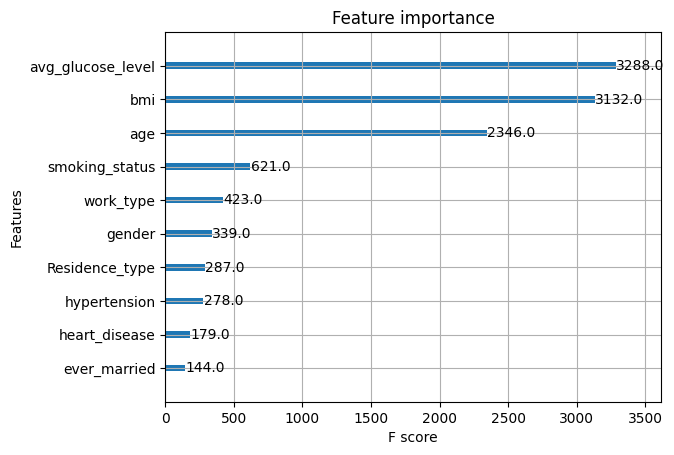

In [28]:
# Incluir al inicio del notebook
%matplotlib inline

import matplotlib.pyplot as plt
from xgboost import plot_importance

# Graficar la importancia de características
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=10)  # Mostrar solo las 10 más importantes
plt.show()